Deliverables



1. A report (in the form of a presentation, both verbal and through a slides)


2. A github repository containing your jupyter notebook that walks through the pipeline along with the .py files necessary to reproduce your model.



In [81]:
import wrangle
import pandas as pd
import numpy as np
import evaluate
import explore
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

In [2]:
#use wrangle.py to import data from mySQL
df =wrangle.get_data_from_sql()

In [3]:
# check DF head
df.head()

,bathrooms,bedrooms,square_feet,fips,lot_size,pool,zip_code,year_built,latitude,longitude,assessed_value,tax_value,transaction_date
0,2.0,3.0,1458.0,6037.0,8284.0,1.0,97318.0,1970.0,34686163.0,-118113100.0,136104.0,2319.90,2017-06-23
1,1.0,2.0,1421.0,6037.0,6707.0,NaN,96018.0,1911.0,33999877.0,-118291863.0,35606.0,543.69,2017-06-30
2,3.0,4.0,2541.0,6059.0,4975.0,NaN,96958.0,2003.0,33694636.0,-117912245.0,880456.0,9819.72,2017-06-01
3,2.0,3.0,1650.0,6037.0,7300.0,NaN,96037.0,1949.0,33985377.0,-118361620.0,614000.0,7673.19,2017-06-01
4,1.0,2.0,693.0,6037.0,2908.0,NaN,96023.0,1921.0,34112946.0,-118208106.0,274237.0,3267.47,2017-06-29


In [4]:
# check DF tail
df.tail()

,bathrooms,bedrooms,square_feet,fips,lot_size,pool,zip_code,year_built,latitude,longitude,assessed_value,tax_value,transaction_date
14985,3.0,5.0,2526.0,6059.0,7800.0,1.0,97018.0,1994.0,33753643.0,-117766503.0,458903.0,5718.72,2017-06-30
14986,3.0,5.0,2735.0,6059.0,7100.0,1.0,97067.0,1963.0,33783173.0,-117817799.0,115387.0,1465.88,2017-06-30
14987,2.0,3.0,1536.0,6037.0,8818.0,1.0,96523.0,1955.0,34058178.0,-117948180.0,297097.0,3519.78,2017-06-30
14988,3.0,5.0,2655.0,6059.0,6000.0,NaN,97065.0,1994.0,33836898.0,-117801369.0,746963.0,8065.50,2017-06-30
14989,3.0,4.0,2305.0,6037.0,5742.0,NaN,96129.0,1949.0,33952368.0,-118441155.0,579047.0,6996.21,2017-06-30


In [5]:
# there are null values in lot_size, pool, zip_code, year_built and tax-value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 13 columns):
bathrooms           14990 non-null float64
bedrooms            14990 non-null float64
square_feet         14990 non-null float64
fips                14990 non-null float64
lot_size            14893 non-null float64
pool                3287 non-null float64
zip_code            14982 non-null float64
year_built          14974 non-null float64
latitude            14990 non-null float64
longitude           14990 non-null float64
assessed_value      14990 non-null float64
tax_value           14989 non-null float64
transaction_date    14990 non-null object
dtypes: float64(12), object(1)
memory usage: 1.5+ MB


In [6]:
#wrangle data to remove NANs
df = wrangle.wrangle_zillow()

In [7]:
#create a new column tax-rate
df['tax_rate'] = df.tax_value/df.assessed_value

In [8]:
df.head()

,bathrooms,bedrooms,square_feet,fips,lot_size,pool,zip_code,year_built,latitude,longitude,assessed_value,tax_value,transaction_date,tax_rate
0,2.0,3.0,1458.0,6037,8284,1,97318,1970,34686163.0,-118113100.0,136104.0,2319.90,2017-06-23,0.017045
1,1.0,2.0,1421.0,6037,6707,0,96018,1911,33999877.0,-118291863.0,35606.0,543.69,2017-06-30,0.015270
2,3.0,4.0,2541.0,6059,4975,0,96958,2003,33694636.0,-117912245.0,880456.0,9819.72,2017-06-01,0.011153
3,2.0,3.0,1650.0,6037,7300,0,96037,1949,33985377.0,-118361620.0,614000.0,7673.19,2017-06-01,0.012497
4,1.0,2.0,693.0,6037,2908,0,96023,1921,34112946.0,-118208106.0,274237.0,3267.47,2017-06-29,0.011915


In [9]:
#https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
#source for county fips code. Read codes in a data DataFrame named fips_codes
#fips_codes = pd.read_clipboard()

In [97]:
fips_code = pd.DataFrame({
    'fips': [6037, 6059, 6111],
    'County':['Los Angles', 'Orange', 'Ventura']
})
fips_code.head()

,fips,County
0,6037,Los Angles
1,6059,Orange
2,6111,Ventura


In [12]:
#merge df and fips_codes 
df = pd.merge(df, fips_code, left_on='fips', right_on='fips', how='left')

In [98]:
df.head(2)

,bathrooms,bedrooms,square_feet,fips,lot_size,pool,zip_code,year_built,latitude,longitude,assessed_value,tax_value,transaction_date,tax_rate,County
0,2.000,3.000,1458.000,6037,8284,1,97318,1970,34686163.000,-118113100.000,136104.000,2319.900,2017-06-23,0.017,Los Angles
1,1.000,2.000,1421.000,6037,6707,0,96018,1911,33999877.000,-118291863.000,35606.000,543.690,2017-06-30,0.015,Los Angles


In [16]:
#split the data into train and test
train, test = train_test_split(df, train_size = .70, random_state = 123)

In [18]:
#create a subset of df with continuous variables to create pairplot
train_plot = df[['bathrooms', 'bedrooms', 'square_feet', 'lot_size', 'assessed_value']]

In [99]:
train_plot.head(2)

,bathrooms,bedrooms,square_feet,lot_size,assessed_value
0,2.000,3.000,1458.000,8284,136104.000
1,1.000,2.000,1421.000,6707,35606.000


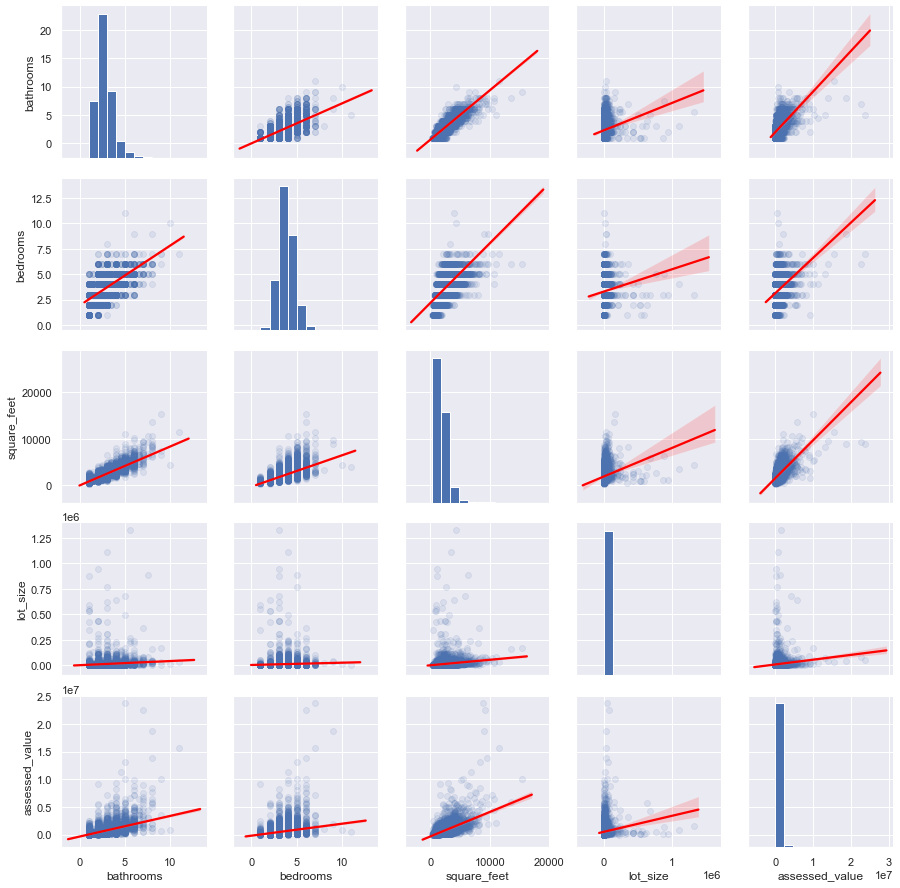

In [20]:
explore.plot_variable_pairs(train_plot)

Assessed_value of seems to be correlated to number of bathrooms, bedrooms, square_feet and lot size

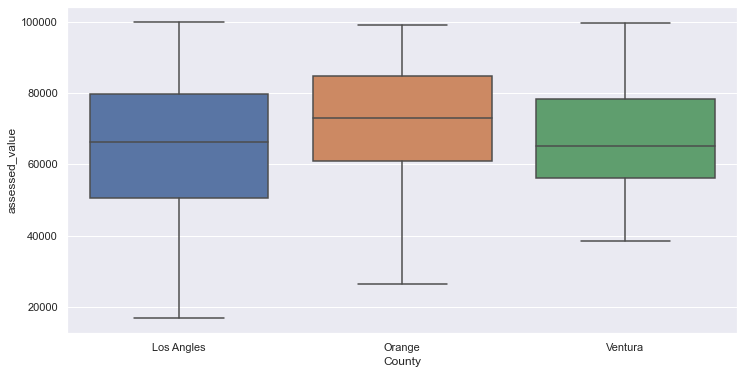

In [22]:
# Lets look at box plot of home values in each county. For better visualization, homes above 1 million are not plotted
plt.figure(figsize=(12,6))
sns.boxplot(x= train[train.assessed_value<100000].County, y= train[train.assessed_value<100000].assessed_value, data=train[train.assessed_value<100000])

In [23]:
train.head()

,bathrooms,bedrooms,square_feet,fips,lot_size,pool,zip_code,year_built,latitude,longitude,assessed_value,tax_value,transaction_date,tax_rate,County
1969,2.0,3.0,1793.0,6037,10032,1,96469,1956,34112268.0,-117736579.0,471862.0,5805.08,2017-05-09,0.012302,Los Angles
11174,1.0,1.0,768.0,6059,1320,1,96181,1964,33890131.0,-117990185.0,233507.0,2828.78,2017-06-19,0.012114,Orange
7468,2.0,3.0,1480.0,6037,7013,0,96161,1955,33857952.0,-118360292.0,98324.0,1310.38,2017-06-01,0.013327,Los Angles
6287,1.0,3.0,1073.0,6037,6328,0,96173,1951,33954504.0,-118032119.0,286277.0,3781.14,2017-05-26,0.013208,Los Angles
11360,1.0,3.0,1188.0,6037,5302,0,96212,1946,33863931.0,-118142447.0,70158.0,1133.55,2017-06-20,0.016157,Los Angles


In [26]:
# median value of homes is a better measure of central tendency for home values due to outliers.
train[train.assessed_value <1000000].assessed_value.median()

341639.5

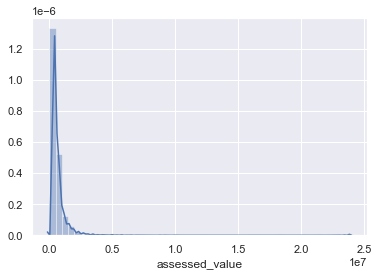

In [27]:
# plot showing distribution of home values. This looks like right skewed distribution
sns.distplot(train.assessed_value)

In [32]:
cm = train_plot.corr()
cm

,bathrooms,bedrooms,square_feet,lot_size,assessed_value
bathrooms,1.000000,0.643196,0.855253,0.140262,0.516795
bedrooms,0.643196,1.000000,0.630065,0.069576,0.273758
square_feet,0.855253,0.630065,1.000000,0.182419,0.602603
lot_size,0.140262,0.069576,0.182419,1.000000,0.116572
assessed_value,0.516795,0.273758,0.602603,0.116572,1.000000


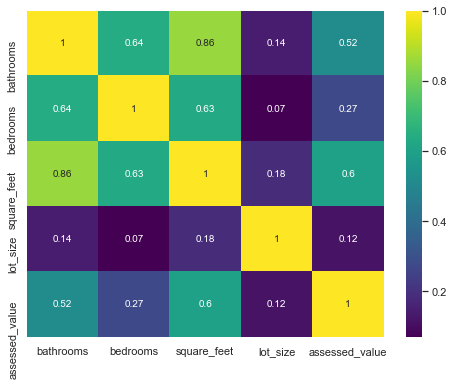

In [35]:
# lets look at heatmap and corresponding correlation values 
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# $H_0$: there is no relationship between home values and number of bedrooms, bathrooms and square_feet
# $H_a$: There is a relationship between home values and number of bedrooms, bathrooms and square_feet

In [38]:
#Lets take a look at simple model based on bathoom, bedroom and squarefeet and compare if against the baseline(median home value)
X_train = train[['bedrooms', 'bathrooms', 'square_feet']]
y_train = train[['assessed_value']]
y_train['y_baseline'] = train['assessed_value'].median()

In [40]:
y_train.head()

,assessed_value,y_baseline
1969,471862.0,385793.0
11174,233507.0,385793.0
7468,98324.0,385793.0
6287,286277.0,385793.0
11360,70158.0,385793.0


In [41]:
# Calculating the baseline (based on median) RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_bl = sqrt(mean_squared_error(y_train.assessed_value, y_train.y_baseline))

rmse_bl

748179.0533946215

In [44]:
#We now create a OLS model based on bedrooms, bathrooms and square_feet
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('assessed_value ~ bedrooms + bathrooms + square_feet', data = train).fit()

# compute predictions and add to original dataframe
y_train['yhat'] = ols_model.predict(X_train)

In [46]:
y_train.head()

,assessed_value,y_baseline,yhat
1969,471862.0,385793.0,497410.978137
11174,233507.0,385793.0,253096.157967
7468,98324.0,385793.0,345580.392571
6287,286277.0,385793.0,101369.746675
11360,70158.0,385793.0,157154.147123


In [45]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         assessed_value   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     2091.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:19:12   Log-Likelihood:            -1.5290e+05
No. Observations:               10411   AIC:                         3.058e+05
Df Residuals:                   10407   BIC:                         3.058e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.639e+04   2.13e+04     -0.768      0.442   -5.82e+04    2.54e+04
bedrooms    -1.498e+05   8136.680    -18.415      0.000   -1.66e+05   -1.34e+05
bathrooms    4.678e+04   1.12e+04      4.186      0.000    2.49e+04    6.87e+04
square_feet   485.0817     11.217     43.243      0.000     463.093     507.070
==============================================================================
Omnibus:                    18304.948   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47841459.329
Skew:                          12.134   Prob(JB):                         0.00
Kurtosis:                     334.206   Cond. No.                     8.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Since my p-value is <0.05, I can reject my null hypothesis.
# This means that there is statistically significant relationship between home prices and  independent variables used above.

In [47]:

rmse = sqrt(mean_squared_error(y_train.assessed_value, y_train.yhat))
rmse

578329.7713362346

#  RMSE for OLS model with bedrooom, bathroom and square feet (578329) is lower than the baseline (based on median)748179.  R2 is 0.37 and p-value is 0.

# I am next going to build a simple linear regression model based on bathrooms, bedrooms and square feet

In [48]:
predictions = pd.DataFrame({
    'actual': y_train.assessed_value
})
predictions.head()

,actual
1969,471862.0
11174,233507.0
7468,98324.0
6287,286277.0
11360,70158.0


In [67]:
X_train1 = X_train[['bedrooms', 'bathrooms', 'square_feet']]
y_train1 = y_train[['assessed_value']]

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [-16390.82570268]
coefficients:  [[-149838.17145678   46782.37648537     485.08174302]]


In [72]:
predictions['yhat_lm'] = lm.predict(X_train1)

In [74]:
predictions['baseline'] = y_train.assessed_value.median()

In [75]:
predictions.head()

,actual,yhat_lm,baseline
1969,471862.0,497410.978137,385793.0
11174,233507.0,253096.157967,385793.0
7468,98324.0,345580.392571,385793.0
6287,286277.0,101369.746675,385793.0
11360,70158.0,157154.147123,385793.0


In [86]:
pd.options.display.float_format = '{:.3f}'.format
predictions.apply(lambda col: sqrt(mean_squared_error(predictions.actual, col)))
#RMSE_lm = np.sqrt(mean_squared_error(y_train.final_grade, y_train.yhat_lm))
#RMSE_lm

#print("linear model\n  Root mean squared error: {:.3}".format(RMSE_lm)

actual          0.000
yhat_lm    578329.771
baseline   748179.053
dtype: float64

# lets use this model on test data and see how well it does there

In [92]:
#using test data and predicting home values based on linear model above
X_test = test[['bedrooms', 'bathrooms', 'square_feet']]
y_test = test[['assessed_value']]
y_test['test_prediction'] = lm.predict(X_test)

In [93]:
y_test.head()

,assessed_value,test_prediction
5884,127320.000,668159.752
1583,576498.000,304992.878
13532,161853.000,476015.294
12732,357559.000,552817.561
11248,355506.000,525327.254


In [96]:
#Calculating RMSE for test predictions
y_test.apply(lambda col: sqrt(mean_squared_error(y_test.assessed_value, col)))

assessed_value         0.000
test_prediction   559911.039
dtype: float64

# The RMSE for test data is lower than the train data!! This means model is working well (atleast better than baseline)